In [2]:
import vugrad as vg
import numpy as np

In [3]:
x = vg.TensorNode(np.random.randn(2,2))

In [4]:
a = vg.TensorNode(np.random.randn(2,2))
b = vg.TensorNode(np.random.randn(2,2))

c = a + b

What does c.value contain?
> c.value contains an ndarray of shape (2,2)

What does c.source refer to?

> c.source refers to the operation (i.e. add, subtract, multiply) that created the C node. It will be None if the TensorNode was created manually.

What is c.source.inputs[0].value?

>In short it contains the values of tensor node 'a'.
The first part is c.source.inputs, which contains a tuple of Tensor Nodes upon which we have applied a specific operation.
In our case, it is an tuple of Tensor nodes [a, b].
When we add [0] to our c.source.inputs, we get the first element of our list which in our case is the tensor node 'a'.
Lastly we do '.value' which returns the matrix of the tensor node 'a'.

What does a.grad refer to? What is its current value?
>Grad refers to the calculated gradient over the loss.
>In the comments of the code it is defined as a "tensor with the same dimensions as the value."
>Inspecting the variable, it is an numpy ndarray initiated with zeros with the same shape as the values of tensor node 'a', thus the value in our case is ((0,0)(0,0))

In [5]:
print(c.source.inputs[0].value)
print(a.value)
print(b.value)

[[ 1.54679325  0.79991631]
 [-0.57829309  2.24545208]]
[[ 1.54679325  0.79991631]
 [-0.57829309  2.24545208]]
[[ 1.5147346   0.49992343]
 [-0.245412   -0.80361063]]


Question 6:
1. An OpNode is defined by its inputs, its outputs and the specific operation it represents (i.e.
summation, multiplication). What kind of object defines this operation?
> It is unclear to me what is meant by this, however during addition in the example of the creation of object 'c' the values of 'a' and 'b' have to be Arrays.

2. In the computation graph of question 5, we ultimately added one numpy array to another
(albeit wrapped in a lot of other code). In which line of code is the actual addition performed?
> Line 323 of core.py, under 'class Add(Op)", where we first make an assert that a and b values have the same shape, then we return their addition.
> This is then returned to line 243 of core.py under the name outputs_raw within class Op.

3. When an OpNode is created, its inputs are immediately set, together with a reference to
the op that is being computed. The pointer to the output node(s) is left None at first. Why is
this? In which line is the OpNode connected to the output nodes?
> The outputs value of an OpNode is a pointer to a Tensor Node object.
> To create a Tensor Node, we must instantiate it with some value (and optionally, a source and name). Because we have no values to give to our Tensor Node object, we cannot create it, ergo we instantiate OpNode.outputs as None.
>
> The outputs are created on line 248 within the method do_forward inside of class Op. The Tensor Node object is instantiated with the previously calculated output value and opnode set as source.

Question 7:
When we have a complete computation graph, resulting in a TensorNode called
loss, containing a single scalar value, we start backpropagation by calling
loss.backward()
Ultimately, this leads to the backward() functions of the relevant Ops being called, which do
the actual computation. In which line of the code does this happen?

> In core.py, class OpNode, under the method backward, on line 159, we call the op class to do our backward calculations for us and then return the values to ginputs_raw.
> In this line, the calculation we do depends on the operation that was performed during the forward pass. The actual backward calculations are done in the static method "backward" of the classes: MatrixMultiply, Multiply, Sub and Add.

Question 8 is on paper. 9 and 10 can all be seen in word document.

QUESTION 11:

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import ssl

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


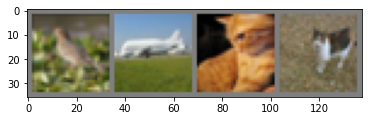

 bird plane   cat   cat


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [28]:
import torch.optim as optim

learning_rates = [0.01,0.001,0.0001,0.00001]
epochs_list = [2, 5, 10, 20]
for epoch_max in epochs_list:
    for lr in learning_rates:
        net = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
        for epoch in range(epoch_max):  # loop over the dataset multiple times

            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                if i % 2000 == 1999:    # print every 2000 mini-batches
                    print('[%d, %5d] loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 2000))
                    running_loss = 0.0
        print(f'Finished Training for lr {lr} and epoch {epoch_max}')

        PATH = f'./cifar_net_lr{lr}_ep{epoch_max}.pth'
        torch.save(net.state_dict(), PATH)

[1,  2000] loss: 2.096
[1,  4000] loss: 2.003
[1,  6000] loss: 1.964
[1,  8000] loss: 1.940
[1, 10000] loss: 1.966
[1, 12000] loss: 1.965
[2,  2000] loss: 1.962
[2,  4000] loss: 1.946
[2,  6000] loss: 1.947
[2,  8000] loss: 1.956
[2, 10000] loss: 1.988
[2, 12000] loss: 1.984
Finished Training for lr 0.01 and epoch 2
[1,  2000] loss: 2.263
[1,  4000] loss: 1.953
[1,  6000] loss: 1.722
[1,  8000] loss: 1.605
[1, 10000] loss: 1.541
[1, 12000] loss: 1.494
[2,  2000] loss: 1.396
[2,  4000] loss: 1.378
[2,  6000] loss: 1.366
[2,  8000] loss: 1.337
[2, 10000] loss: 1.309
[2, 12000] loss: 1.274
Finished Training for lr 0.001 and epoch 2
[1,  2000] loss: 2.304
[1,  4000] loss: 2.301
[1,  6000] loss: 2.298
[1,  8000] loss: 2.287
[1, 10000] loss: 2.260
[1, 12000] loss: 2.214
[2,  2000] loss: 2.152
[2,  4000] loss: 2.104
[2,  6000] loss: 2.069
[2,  8000] loss: 2.031
[2, 10000] loss: 1.985
[2, 12000] loss: 1.961
Finished Training for lr 0.0001 and epoch 2
[1,  2000] loss: 2.304
[1,  4000] loss: 2.3

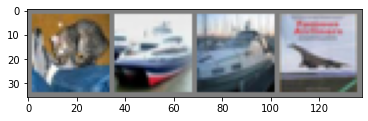

GroundTruth:    cat  ship  ship plane


In [17]:
# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [31]:
print('Accuracy of the network on the 10000 test images:\n')

for lr in learning_rates:
    ac = []
    for epoch_max in epochs_list:
        PATH = f'./cifar_net_lr{lr}_ep{epoch_max}.pth'
        dataiter = iter(testloader)
        images, labels = dataiter.next()
        net = Net()
        net.load_state_dict(torch.load(PATH))
        outputs = net(images)

        _, predicted = torch.max(outputs, 1)

        correct = 0
        total = 0
        # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                # calculate outputs by running images through the network
                outputs = net(images)
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        ac.append(100 * correct / total)
    print(f'{ac}')

Accuracy of the network on the 10000 test images:

[29.42, 28.28, 10.0, 24.26]
[55.58, 61.91, 62.54, 59.13]
[27.65, 47.61, 57.57, 63.24]
[10.57, 13.53, 27.22, 37.78]


In [23]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 49.9 %
Accuracy for class car   is: 63.1 %
Accuracy for class bird  is: 41.9 %
Accuracy for class cat   is: 28.7 %
Accuracy for class deer  is: 45.4 %
Accuracy for class dog   is: 68.4 %
Accuracy for class frog  is: 49.9 %
Accuracy for class horse is: 64.9 %
Accuracy for class ship  is: 61.6 %
Accuracy for class truck is: 73.5 %


In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)


cuda:0


This is the final question 12.
We are doing ASGD gradient descent, as well as adding batch normalization and another fully connected layer.

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 42)
        self.fc4 = nn.Linear(42, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.bn1(x))
        x = self.pool(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [13]:
import torch.optim as optim

learning_rates = [0.01,0.001,0.0001,0.00001]
epochs_list = [2, 5, 10, 20]
for epoch_max in epochs_list:
    for lr in learning_rates:
        net = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.ASGD(net.parameters(), lr=lr)
        for epoch in range(epoch_max):  # loop over the dataset multiple times

            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                if i % 2000 == 1999:    # print every 2000 mini-batches
                    print('[%d, %5d] loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 2000))
                    running_loss = 0.0
        print(f'Finished Training for lr {lr} and epoch {epoch_max}')

        PATH = f'./ASGD_net_lr{lr}_ep{epoch_max}.pth'
        torch.save(net.state_dict(), PATH)

[1,  2000] loss: 2.137
[1,  4000] loss: 1.859
[1,  6000] loss: 1.743
[1,  8000] loss: 1.661
[1, 10000] loss: 1.618
[1, 12000] loss: 1.563
[2,  2000] loss: 1.501
[2,  4000] loss: 1.439
[2,  6000] loss: 1.419
[2,  8000] loss: 1.361
[2, 10000] loss: 1.357
[2, 12000] loss: 1.331
Finished Training for lr 0.01 and epoch 2
[1,  2000] loss: 2.305
[1,  4000] loss: 2.302
[1,  6000] loss: 2.296
[1,  8000] loss: 2.267
[1, 10000] loss: 2.188
[1, 12000] loss: 2.086
[2,  2000] loss: 1.916
[2,  4000] loss: 1.844
[2,  6000] loss: 1.811
[2,  8000] loss: 1.774
[2, 10000] loss: 1.744
[2, 12000] loss: 1.711
Finished Training for lr 0.001 and epoch 2
[1,  2000] loss: 2.307
[1,  4000] loss: 2.306
[1,  6000] loss: 2.304
[1,  8000] loss: 2.304
[1, 10000] loss: 2.303
[1, 12000] loss: 2.302
[2,  2000] loss: 2.301
[2,  4000] loss: 2.302
[2,  6000] loss: 2.300
[2,  8000] loss: 2.300
[2, 10000] loss: 2.299
[2, 12000] loss: 2.298
Finished Training for lr 0.0001 and epoch 2
[1,  2000] loss: 2.311
[1,  4000] loss: 2.3

In [ ]:
# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
print('Accuracy of the network on the 10000 test images:\n')

for lr in learning_rates:
    ac = []
    for epoch_max in epochs_list:
        PATH = f'./ASGD_net_lr{lr}_ep{epoch_max}.pth'
        dataiter = iter(testloader)
        images, labels = dataiter.next()
        net = Net()
        net.load_state_dict(torch.load(PATH))
        outputs = net(images)

        _, predicted = torch.max(outputs, 1)

        correct = 0
        total = 0
        # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                # calculate outputs by running images through the network
                outputs = net(images)
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        ac.append(100 * correct / total)
    print(f'{ac}')

Accuracy of the network on the 10000 test images:

[52.63, 62.1, 61.45, 61.72]
[36.66, 52.76, 61.54, 63.91]
[10.05, 14.92, 26.54, 45.42]
[10.02, 9.53, 9.94, 10.7]
